basic exploration of the dataset 

eda - explaratory data analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      1785 non-null   object 
 1   image_path     1785 non-null   object 
 2   Sampling_Date  1785 non-null   object 
 3   State          1785 non-null   object 
 4   Species        1785 non-null   object 
 5   Pre_GSHH_NDVI  1785 non-null   float64
 6   Height_Ave_cm  1785 non-null   float64
 7   target_name    1785 non-null   object 
 8   target         1785 non-null   float64
dtypes: float64(3), object(6)
memory usage: 125.6+ KB
None
       Pre_GSHH_NDVI  Height_Ave_cm       target
count    1785.000000    1785.000000  1785.000000
mean        0.657423       7.595985    24.782295
std         0.151972      10.273725    25.823738
min         0.160000       1.000000     0.000000
25%         0.560000       3.000000     4.818200
50%         0.690000       4.000000    18.200000
75%     

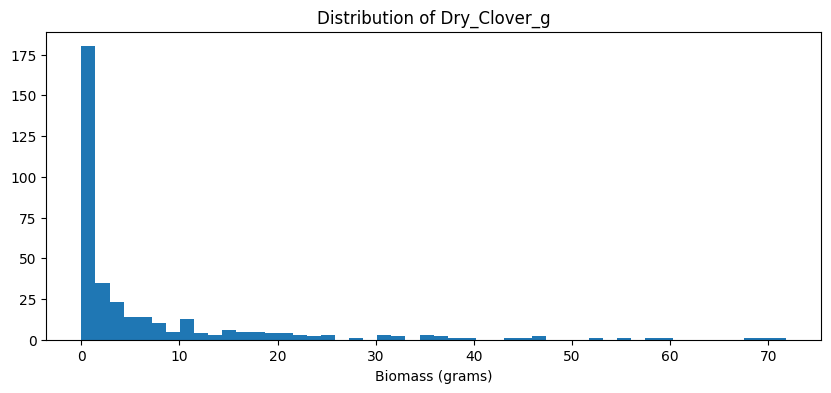

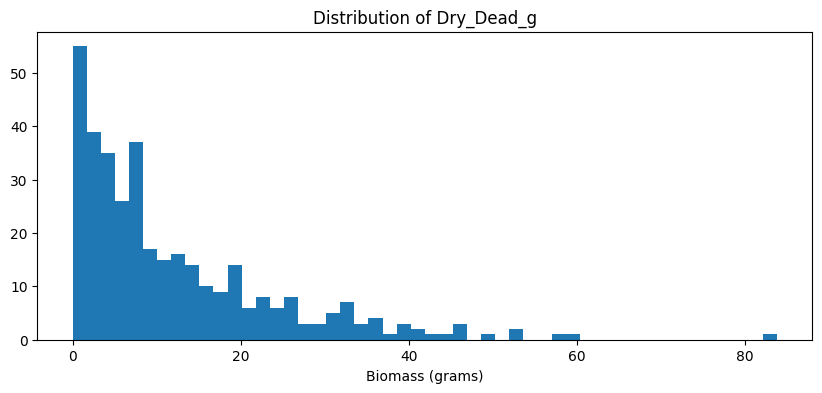

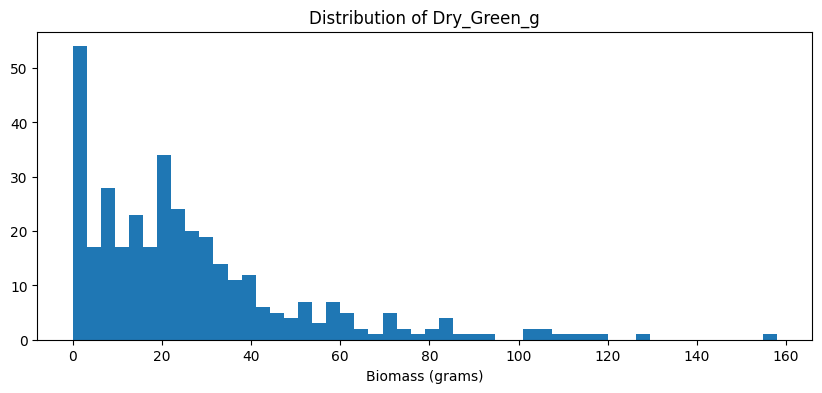

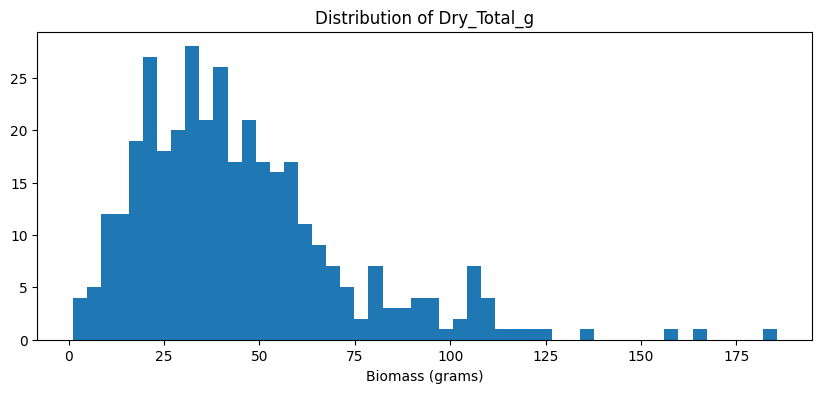

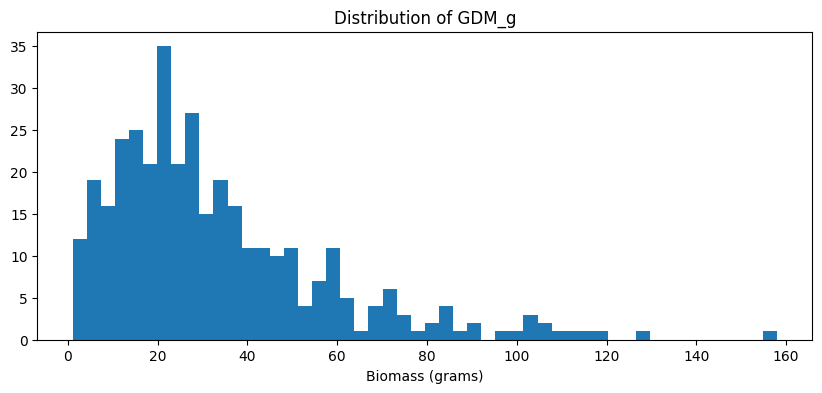

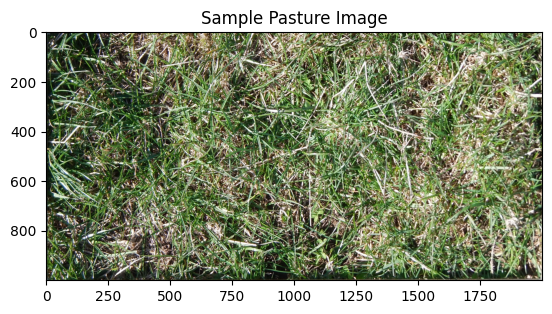

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load data
train_df = pd.read_csv('../data/raw/csiro-biomass/train.csv')
test_df = pd.read_csv('../data/raw/csiro-biomass/test.csv')
# Basic info
print(train_df.info())
print(train_df.describe())
print(train_df['target_name'].value_counts())

# Check for missing values
print(train_df.isnull().sum())

# Look at target distributions
for target in train_df['target_name'].unique():
    subset = train_df[train_df['target_name'] == target]
    plt.figure(figsize=(10, 4))
    plt.hist(subset['target'], bins=50)
    plt.title(f'Distribution of {target}')
    plt.xlabel('Biomass (grams)')
    plt.show()

# Load and display a few sample images
sample_img_path = os.path.join('../data/raw/csiro-biomass', train_df['image_path'].iloc[0])
img = Image.open(sample_img_path)
plt.imshow(img)
plt.title('Sample Pasture Image')
plt.show()

It's important to clarify the simple definition of biomass: Biomass is organic  material obtained from living or recently living plants or animals that can be used as a source of energy.  


After exploring the dataset, it is observed that the dataset possesses 
- 1785 rows, 357 unique images, and 5 target measures per image. 

5 Targets - each unique pasture photo tgets measured for 5 differnet things, these are the targets that my model needs to predict. 

The dataset also possesses tabular features, NDVI and height
NDVI = Normalized Difference Vegetation Index 
- measures health of vegetation using sattelite data, ranges from v alues of -1 with +1, -1 meaning dead vegeation and +1 nmeaning lively green vegetation. 
- In theory, the more healthy vegetation, the greater presence of photosynthesis and the greater biomass, vice versa also applies. So a soft linear relationship could be observed between NDVI and biomass. 

There is also a tabular feature called Height measured in cm 
- some extreme outliers that could signify an error or just a very tall species of grass. there is an extreme outlier of 70 cm, abnormally tall grass pasture given average is around 7.6 cm. 
- since taller grass means more organic matter, it usually means that the taller grass will have a greater amount of biomass. 

Each image should have the following predictions
Dry_Green_g - Living green plant matter (photosynthesizing)
Dry_Dead_g - Dead/brown plant material (decomposing)
Dry_Clover_g - Specifically clover biomass (nitrogen-fixing legume, important for farmers)
GDM_g - "Green Dry Matter" (likely = Dry_Green + Dry_Clover) - need to confirm this 
Dry_Total_g - Total biomass (should = Green + Dead + Clover)
